# **RIO 208 - TP GÉOMÉTRIE STOCHASTIQUE**



##Préparer par:
**Rami EL FEGHALI - Sory BARRY**

## 1. Introduction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.spatial import Voronoi, voronoi_plot_2d


In [ ]:
# ploting function utilisée dans la question 6 et 7
def plot(dataset,MdC,SIR_db):
  vor = Voronoi(dataset)
  fig = voronoi_plot_2d(vor,show_vertices=False)
  plt.scatter(MdC[:,0], MdC[:,1],c=SIR_db, cmap='viridis', s=10 )
  plt.colorbar()
  plt.show()

## 2. Processus de Poisson

###Question 1

l:= lambda, intensité du processus de Poisson en km-2
a:=  est le côté du carré en Km

mu:= la mesure mu d'intensité lambda est égale à lambda\*delta, avec delta la mesure de Lebesgue. \
Vu qu'on travaille dans un domaine de R**2, la mesure de Lebesgue est donc l'aire du carré de côté a


Le nombre de points: 47


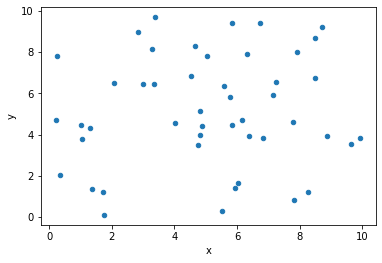

In [ ]:
l= 0.5 #lambda, intensité du processus de Poisson en km-2
a= 10 #a est le côté du carré en Km

mu= l*a*a #la mesure mu d'intensité lambda est égale à lambda*delta, avec delta la mesure de Lebesgue, 
#vu qu'on travaille dans un domaine de R**2, la mesure de Lebesgue est donc l'aire du carré de côté a

N = np.random.poisson(mu)

print("Le nombre de points:" , N)

dataset=np.zeros((N,2)) #Matrice N lignes deux colonnes contenant les coordonnées des stations de base
for i in range(N):
  dataset[i][0] = np.random.uniform(0,a)
  dataset[i][1] = np.random.uniform(0,a) 

df = pd.DataFrame(dataset)
df.columns=["x","y"]

ax = df.plot.scatter(x='x',y='y')

In [ ]:
print(np.random.uniform())

0.4167543008461241


###Question 2
Le nombre moyen de stations de base est 50.\
En effet, l'ésperence d'une variable aléatoire A  qui suit une loi de Poisson est mu(A) ici 50.

###Question 3

In [ ]:
array = []
for i in range(N):
  p=dataset[i]
  min= 100
  for j in range(N):
    q= dataset[j]
    temp=np.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2)
    if temp < min and temp >0: # >0 pour pas prendre le point lui meme
      min = temp
  array.append(min)

print("resultat experimental: ",np.mean(array))
  
  
d_m= 1/(2*np.sqrt(l))
print("resultat théorique: ", d_m)

resultat experimental:  0.7095367383773946
resultat théorique:  0.7071067811865475


###Question 4

1- On a fait le calcul de la distance moyenne sur une seule simulation du processus de Poisson.\
Si on voulait avoir une valeur plus proche de la valeur théorique, on aurait du faire une moyenne des moyennes de plusieurs simulations.

In [ ]:
nbr= 100 # nombre de simulation

array_total = []

for i in range(nbr):
  l= 0.5
  a= 10
  mu= l*a*a

  NN = np.random.poisson(mu)

  dataset2=np.zeros((NN,2))
  for i in range(NN):
    dataset2[i][0] = np.random.uniform(0,a)
    dataset2[i][1] = np.random.uniform(0,a) 

  array = []
  for i in range(NN):
    p=dataset2[i]
    min= 100
    for j in range(NN):
      q= dataset2[j]
      temp=np.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2)
      if temp < min and temp >0:
        min = temp
    array.append(min)
  array_total.append(np.mean(array))

print(np.mean(array_total))

0.7560987190215539


2- A cause des effets de bords, une station de base proche d'un coté du carré a moins de voisins qu'une station au centre. Cette limitation n'existe pas en théorie, ou on a un plan infini.\
Si on veut essayer de pallier ce problème, on peut faire une simulation sur une partie interne du carré et donc le problème de limite est évité.


## 3. Carte de SIR

###Question 5

Là, il s'agit de travailler sur un carré de petits carrés de taille epsilon.\
MdC est la matrice des petits carrés qui contient les coordonnnées des centres des pixels

In [ ]:

gamma=2.5
sigma=2
X=0
dist=[]
dist_min= 0.05

MdC = np.zeros((10000,2))
#print(MdC)
for i in range(0,100):
  for j in range(0,100):
    MdC[i+100*j]=[0.05+0.1*i,0.05+0.1*j]
print(MdC)

[[0.05 0.05]
 [0.15 0.05]
 [0.25 0.05]
 ...
 [9.75 9.95]
 [9.85 9.95]
 [9.95 9.95]]


###Question 6
Pour le calcul de S(i,j):
*   on déclare tout d'abord une matrice de 10000 lignes et N colonnes, respectivement le nombre de pixels et le nombre de BS.
*  Puis pour chaque station de base, on détermine la puissance P(j)
*  Et on calcule pour chaque couple (pixel, BS), les coefficients de fading et de shadowing, et la distance entre le pixel et la BS


 

In [ ]:
#Calcul de S
S= np.empty(shape=(10000, N))
for j in range(N):
    P=np.random.uniform(0,1)
    for i in range (10000):
      #calcul fading
      fading=expon.rvs(1)

      #calcul shadowing
      X= np.random.randn()
      shadowing=10**(2*X/10)

      #calcul distance
      dist=np.sqrt((MdC[i][0]-dataset[j][0])**2 + (MdC[i][1]-dataset[j][1])**2)
      if dist < 0.05 :
        dist = 0.05
      
      #calcul puissance S(i,)
      S[i][j]=P*fading*shadowing/(dist)**gamma

Ici, pour le calcul de SIR relatif à chaque pixel, on definit une fonction générale SIR_fct(). Cette fonction prendra en paramètre une autre fonction sur la base de laquelle, on déterminera la station de base serveuse bts(i).\
Pour la question 6, cette fonction en paramètre sera la fonction plusProche() qui prend en paramètre les coordonnées des centres des carrés et retourne le numéro de la station de base la plus proche du pixel.

In [ ]:
#Calcul SIR
#definition de la somme

def SIR_fct(bts):
  SIR=[]
  for i in range(10000):
    tmp= bts(MdC[i],i) # point d'uniformisation des 2 fonctions
    S_tmp=S[i][tmp] #S_tmp c'est S(i,bts(i))
  #Calcul de la somme au dénominateur
    Somme=0
    for j in range(N):
      Somme= Somme + S[i][j]

    SIR.append(S_tmp/(Somme-S_tmp))
  return SIR

In [ ]:
#determination de la bts, station de base la plus proche du carré
def plusProche(m,i): # avec m les coordonnées du centre du carré 
                    # et i un parametre non utilisé, pour uniformisation avec la fonction plusGrandePuissance et SIR_fct 
  tmp=-1
  min=1000
  for k in range(N):
    temp=np.sqrt((m[0]-dataset[k][0])**2 + (m[1]-dataset[k][1])**2)
   # print(m)
    if temp < min:
      tmp=k   # tmp est la station de base la plus proche
  return tmp

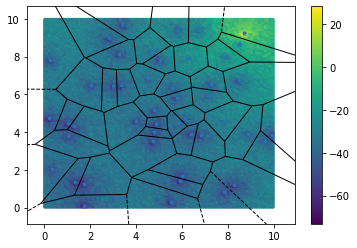

In [ ]:
SIR_db1= 10*np.log10(SIR_fct(plusProche))
plot(dataset,MdC,SIR_db1)

###Question 7

Dans cette question, on reutilise la fonction SIR_fct avec comme parametre la fonction plusGrandePuissance avec comme paramètre m et i, respectivement un argument d'uniformisation et le numero du pixel.\
Cette fonction retourne l'indice de la bts qui delivre la plus grande puissance

In [ ]:
def plusGrandePuissance(m,i): #m parametre non utiliser, pour uniformisation
                              #i numero du pixels auquel est associé une ligne dans S(i,j)
    temp=S[i,:]

    return np.where(temp==temp.max())[0][0]

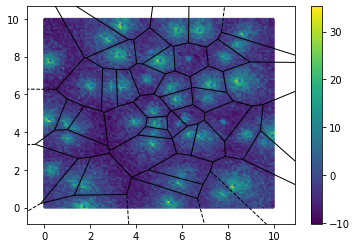

In [ ]:
SIR_db2= 10*np.log10(SIR_fct(plusGrandePuissance))
plot(dataset,MdC,SIR_db2)

###Question 8

On remarque que lorsqu'on choisit la station de base serveuse comme étant celle qui délivre la plus grande puissance, on obtient un meilleur SIR que si on avait choisit la station de base serveuse comme étant la plus proche.\
Ici on ne peut pas se baser sur les couleurs pour comparer les deux SIR vu que les deux échelles des figure ne sont pas les mêmes. La première échelle est entre -60 et 20db tandisque la deuxième est entre -10 et 30



## 4. Ajout des utilisateurs

###Question 9

Le nombre d'utilisateurs': 507
Le nombre de stations de bases': 47


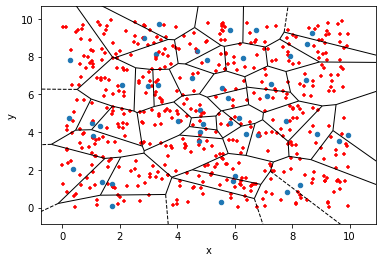

In [ ]:
l1= 5 #lambda, intensité du processus de Poisson en km-2
a= 10 #a est le côté du carré en Km

mu1= l1*a*a #la mesure mu d'intensité lambda est égale à lambda*delta, avec delta la mesure de Lebesgue, 
#vu qu'on travaille dans un domaine de R**2, la mesure de Lebesgue est donc l'aire du carré de côté a

N1 = np.random.poisson(mu1)

print("Le nombre d'utilisateurs':" , N1) 
print("Le nombre de stations de bases':" , N) 
dataset1=np.zeros((N1,2)) #Matrice N1 lignes deux colonnes contenant les coordonnées des utilisateurs
for i in range(N1):
  dataset1[i][0] = np.random.uniform(0,a)
  dataset1[i][1] = np.random.uniform(0,a) 

df1 = pd.DataFrame(dataset1)
df1.columns=["x","y"]
ax = df.plot.scatter(x='x',y='y')
ay = df1.plot.scatter(x='x',y='y',marker='+',c='red',ax=ax)
vor = Voronoi(dataset)
fig1 = voronoi_plot_2d(vor,ax=ay,show_vertices=False)

Le nombre moyen d'utilisateur est 500 qui est en fait égal à l'espérence du Processus de Poisson d'intensité l1.\
On en déduit donc que le nombre moyen d'utilisateur par cellule est le rapport entre le nombre moyen d'utilisateur et le nombre moyen de station de base 500/50=10

###Question 10

Pour le calcul des valeurs de l'histogramme:\
Sur l'axe des ordonnées, on a le nombre d'occurence du nombre d'utilisateurs par cellule pour chaque simulation et en absice, la valeur arrondie du nombre d'utilisateurs par cellule pour chaque simulation.

(array([ 4., 14., 25., 26., 19.,  6.,  3.]),
 array([ 7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 7 Patch objects>)

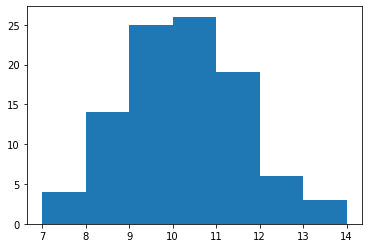

In [ ]:
hist=[]
for i in range (100):
  N3 = np.random.poisson(mu1)
  N4=np.random.poisson(mu)
  hist.append(N3/N4)
hist.sort()
plt.hist(hist,range(round(hist[0]), round(hist[-1]+1) )) 

###Question 11
C'est normal qu'il y ait un écart entre les valeurs observées vu que ces processus sont des processus de Poisson aléatoire.\
Néanmoins, on remaque que les valeurs sont centrées autour de 10 qui est la moyenne qu'on a calculée dans la question précédente

###Question 12

Dans cette question on garde les mêmes stations de bases qu'on a déterminé dans la question 1

In [ ]:
#Calcul de la matrice de puissance S1(i,j), puissance recu par l'utilisateur i de la station de base j
S1= np.empty(shape=(N1, N))  #N1 ligne representant N1 utilisateurs, N colonnes pour les N stations de bases
for j in range(N):
    P=np.random.uniform(0,1)
    for i in range (N1):
      fading=expon.rvs(1)
      X= np.random.randn()
      shadowing=10**(2*X/10)

      #calcul distance
      dist=np.sqrt((MdC[i][0]-dataset[j][0])**2 + (MdC[i][1]-dataset[j][1])**2)
      if dist < 0.05 :
        dist = 0.05
      S1[i][j]=P*fading*shadowing/(dist)**gamma

In [ ]:
def SIR_fct1(bts):
  SIR=[]
  for i in range(N1):
    tmp= bts(MdC[i],i)
    S_tmp=S1[i][tmp] #S_tmp c'est S(i,bts(i))
  #Calcul de la somme au dénominateur
    Somme=0
    for j in range(N):
      Somme= Somme + S1[i][j]

    SIR.append(S_tmp/(Somme-S_tmp))
  return SIR

In [ ]:
def plusProche1(m,i): # avec m les coordonnées du centre du carré 
                    # et i un parametre non utilisé, pour uniformisation 
  tmp=-1
  min=1000
  for k in range(N):
    temp=np.sqrt((m[0]-dataset1[k][0])**2 + (m[1]-dataset1[k][1])**2)
   # print(m)
    if temp < min:
      tmp=k   # tmp est la station de base la plus proche
  return tmp

In [ ]:
def plusGrandePuissance1(m,i): #m parametre non utiliser, pour uniformisation
                              #i numero de l'utilisateur auquel est associé une ligne dans S(i,j)
    temp=S1[i,:]

    return np.where(temp==temp.max())[0][0]

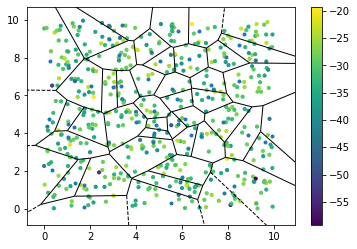

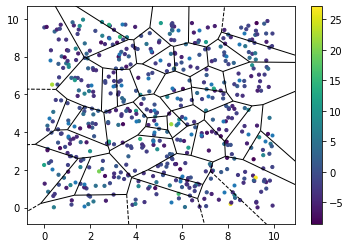

In [ ]:
SIR_db3= 10*np.log10(SIR_fct1(plusProche1))
SIR_db4= 10*np.log10(SIR_fct1(plusGrandePuissance1))
plot(dataset,dataset1,SIR_db3)
plot(dataset,dataset1,SIR_db4)

###Question 13


####Question 13.1
Dans un premier temps, on considère la station de base serveuse comme étant la plus proche que ce soit du pixel ou de l'utilisateur

In [ ]:
#a besoin de +-3min runtime sur google colab
hist_p=[]
hist_u=[]
hist_p= 10*np.log10(SIR_fct(plusProche))
hist_u= 10*np.log10(SIR_fct1(plusProche1))
#print(hist_p.shape)
for i in range (1,100):
  SIR_db_p= 10*np.log10(SIR_fct(plusProche))
  SIR_db_u= 10*np.log10(SIR_fct1(plusProche1))
  hist_p=hist_p+SIR_db_p
  hist_u=hist_u+SIR_db_u
hist_p.sort()
hist_p=hist_p/100
hist_u.sort()
hist_u=hist_u/100

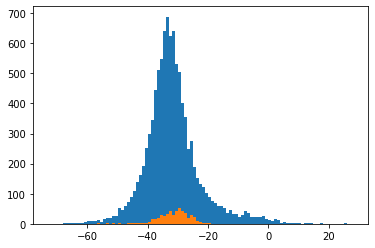

In [ ]:
plt.hist(hist_p,range(round(hist_p[0]), round(hist_p[-1]+1) )); #supprimer le ";" si besoin de voir les données de l'histogramme
plt.hist(hist_u,range(round(hist_u[0]), round(hist_u[-1]+1) ));

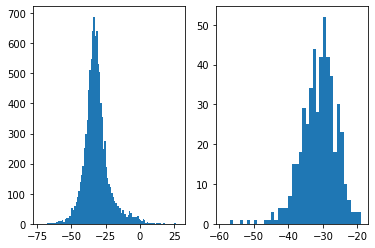

In [ ]:
plt.subplot(1, 2,1)
plt.hist(hist_p,range(round(hist_p[0]), round(hist_p[-1]+1) ));
plt.subplot(1, 2,2)
plt.hist(hist_u,range(round(hist_u[0]), round(hist_u[-1]+1) ));

####Question 13.2
On considère à présent la station de base serveuse comme étant celle qui délivre la plus grande  puissance que ce soit du pixel ou de l'utilisateur

In [ ]:
hist_p1= 10*np.log10(SIR_fct(plusGrandePuissance))
hist_u1= 10*np.log10(SIR_fct1(plusGrandePuissance1))
#print(hist_p.shape)
for i in range (1,100):
  SIR_db_p= 10*np.log10(SIR_fct(plusGrandePuissance))
  SIR_db_u= 10*np.log10(SIR_fct1(plusGrandePuissance1))
  hist_p1=hist_p1+SIR_db_p
  hist_u1=hist_u1+SIR_db_u
hist_p1.sort()
hist_p1=hist_p1/100
hist_u1.sort()
hist_u1=hist_u1/100

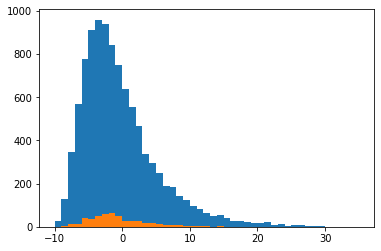

In [ ]:
plt.hist(hist_p1,range(round(hist_p1[0]), round(hist_p1[-1]+1) ));  #supprimer le ";" si besoin de voir les données de l'histogramme
plt.hist(hist_u1,range(round(hist_u1[0]), round(hist_u1[-1]+1) ));

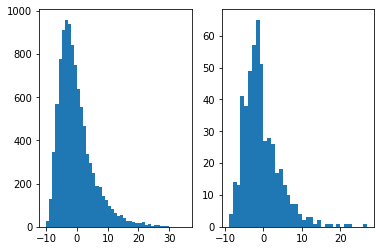

In [ ]:
plt.subplot(1, 2,1)
plt.hist(hist_p1,range(round(hist_p1[0]), round(hist_p1[-1]+1) ));  
plt.subplot(1, 2,2)
plt.hist(hist_u1,range(round(hist_u1[0]), round(hist_u1[-1]+1) ));

###Question 14
On remarque que les deux histogrammes sont centrés à peu près sur la même valeur.\
En effet cela est du au fait que les utilisateurs sont un échantillon aléatoire de l'ensemble des pixels.\ 
Et on peut avoir des cellules avec 0 utilisateurs.

###Question 15
La méthode des utilisateurs nous paraît être la meilleure pour estimer le SIR.\
En effet, il est plus précis de calculer le SIR des utilisateurs du domaine que de calculer le SIR sur l'ensemble de tous les pixels du plan.